<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [40]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Для корректной работы Jupyter Notebook
%matplotlib inline
# Для корректного отображения графиков в тёмной теме
plt.style.use('default')

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [41]:
main_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [42]:
main_df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [43]:
display(main_df.info())

for col in list(main_df.columns):
    empty_cell_num = main_df[col].isnull().sum()
    if empty_cell_num > 0:
        print(f'В столбце \"{col}\" есть {empty_cell_num} пустых значений.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

В столбце "Опыт работы" есть 168 пустых значений.
В столбце "Последнее/нынешнее место работы" есть 1 пустых значений.
В столбце "Последняя/нынешняя должность" есть 2 пустых значений.


5. Выведите основную статистическую информацию о столбцах.


In [44]:
main_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [45]:
def get_graduation(grad: str) -> str:
    '''Формирует краткую категорию образования
    Arguments:
        grad [str] -- Структурированная строка из ячейки признака
            "Образование и ВУЗ"
    Returns:
        [str] -- Строка с категорией образования (без слова "образование")
            или "Нет данных" при неудаче
    '''
    grad_list = grad.split(' ')
    if grad_list[1] == 'образование':
        return grad_list[0]
    else:
        return grad_list[0] + ' ' + grad_list[1]
    return 'Нет данных'


# Формирование и проверка корректности признака "Образование"
main_df['Образование'] = main_df['Образование и ВУЗ'].apply(get_graduation)
display(main_df['Образование'].value_counts())

# Ответ на вопрос Задания 3.1
print(
    '\nЧисло соискателей со средним образованием -',
    main_df['Образование'].value_counts().loc['Среднее']
    )

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64


Число соискателей со средним образованием - 559


In [46]:
''' ___ДОПОЛНИТЕЛЬНО___
    Для дальнейших исследований может пригодиться год окончания ВУЗа.
    Поэтому перед удалением признака "Образование и ВУЗ" создаётся признак
    "Год выпуска".
'''
def get_graduation_year(grad: str) -> int:
    '''Извлекает год окончания образования
    Arguments:
        grad [str] -- Структурированная строка из ячейки признака
            "Образование и ВУЗ"
    Returns:
        [int] -- Выпускной год
    '''
    return int(re.search(r'\d{4}', grad).group(0))


main_df['Год выпуска'] = main_df['Образование и ВУЗ'].apply(get_graduation_year)

# Удаление признака "Образование и ВУЗ"
main_df.drop('Образование и ВУЗ', axis='columns', inplace=True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [47]:
def get_age(age: str) -> int:
    ''' Находит цифру возраста
    Arguments:
        age [str] -- Структурированная строка из ячейки признака
            "Пол, возраст"
    Returns:
        [int] -- Возраст в годах
    '''
    age_str = age.split(',')[1].strip()
    return int(re.search(r'\d+', age_str).group(0))


main_df['Пол'] = main_df['Пол, возраст'].apply(lambda x: x[0])
main_df['Возраст'] = main_df['Пол, возраст'].apply(get_age)

# Ответы на вопросы Задания 3.2
women_percent = round(main_df[main_df['Пол'] == 'Ж'].shape[0]
                      / main_df['Пол'].shape[0] * 100, 2)
print(f'Женских резюме в предоставленных данных - {women_percent}%')
print(
    'Средний возраст соискателей (в годах) -',
    round(main_df['Возраст'].mean(), 2)
    )

# Удаление признака "Пол, возраст"
main_df.drop('Пол, возраст', axis='columns', inplace=True)

Женских резюме в предоставленных данных - 19.07%
Средний возраст соискателей (в годах) - 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [49]:
def convert_experience_to_months(experience_str: str) -> int:
    '''Вычисляет опыт работы в месяцах
    Arguments:
        experience_str [str] -- Структурированная строка из ячейки
            признака "Опыт работы"
    Returns:
        [int] -- Число месяцев или NaN при ошибке
    '''
    try:
        experience_list = experience_str.split(maxsplit=5)
        if experience_list[3][0] == 'м':
            experience_months = int(experience_list[2])
        else:
            experience_months = int(experience_list[2]) * 12
            if experience_list[4].isdecimal():
                experience_months += int(experience_list[4])
        return experience_months
    except:
        return pd.NA


main_df['Опыт работы (месяц)'] \
    = main_df['Опыт работы'].apply(convert_experience_to_months)

# Ответ на вопрос Задания 3.3
print(
    'Медианный опыт работы -',
    round(main_df['Опыт работы (месяц)'].median()),
    'месяцев'
    )

# Удаление признака "Опыт работы"
main_df.drop('Опыт работы', axis='columns', inplace=True)

Медианный опыт работы - 100 месяцев


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [50]:
def get_city(city_str: str) -> str:
    ''' Находит название города
    Arguments:
        city_str [str] -- Структурированная строка из ячейки признака
            "Город, переезд, командировки"
    Returns:
        [str] -- Категория города
    '''
    million_cities = [
        'Волгоград',
        'Воронеж',
        'Екатеринбург',
        'Казань',
        'Красноярск',
        'Нижний Новгород',
        'Новосибирск',
        'Омск',
        'Пермь',
        'Ростов-на-Дону',
        'Самара',
        'Уфа',
        'Челябинск'
        ]
    city = city_str.split()[0]
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'


def is_ready_for_move(move_str: str) -> bool:
    ''' Определяет готовность к переезду
    Arguments:
        move_str [str] -- Структурированная строка из ячейки признака
            "Город, переезд, командировки"
    Returns:
        [bool] -- Готов или нет. Если пропущена информация о готовности
            к переездам, то False.
    '''
    if ('не готов к переезду' in move_str or
        'не готова к переезду' in move_str):
            return False
    elif 'перее' not in move_str:
            return False
    else:
            return True


def is_ready_for_mission(mission_str: str) -> bool:
    ''' Определяет готовность к командировкам
    Arguments:
        mission_str [str] -- Структурированная строка из ячейки признака
            "Город, переезд, командировки"
    Returns:
        [bool] -- Готов или нет. Если пропущена информация о готовности
            к командировкам, то False.
    '''
    if ('не готов к командировкам' in mission_str or
        'не готова к командировкам' in mission_str):
            return False
    elif 'командиров' not in mission_str:
            return False
    else:
            return True


main_df['Город'] = main_df['Город, переезд, командировки'].apply(get_city)
main_df['Готовность к переезду'] \
    = main_df['Город, переезд, командировки'].apply(is_ready_for_move)
main_df['Готовность к командировкам'] \
    = main_df['Город, переезд, командировки'].apply(is_ready_for_mission)

# Ответы на вопросы Задания 3.4
pitermen = main_df[main_df['Город'] == 'Санкт-Петербург'].shape[0]
print(
    'В Санкт-Петербурге живут',
    round(pitermen / main_df.shape[0] * 100),
    'процентов соискателей'
    )
mask1 = main_df['Готовность к переезду'] == True
mask2 = main_df['Готовность к командировкам'] == True
print(
    'Готовы одновременно к переезду и командировкам',
    round(main_df[mask1 & mask2].shape[0] / main_df.shape[0] * 100),
    'процентов соискателей'
    )

# Удаление признака "Город, переезд, командировки"
main_df.drop('Город, переезд, командировки', axis='columns', inplace=True)

В Санкт-Петербурге живут 11 процентов соискателей
Готовы одновременно к переезду и командировкам 32 процентов соискателей


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [51]:
employments_list = [
    'полная занятость',
    'частичная занятость',
    'проектная работа',
    'стажировка',
    'волонтерство'
    ]
schedules_list = [
    'полный день',
    'гибкий график',
    'сменный график',
    'вахтовый метод',
    'удаленная работа'
    ]
for employment in employments_list:
    main_df[employment] = main_df['Занятость'].aggregate(lambda x: True
                                                         if employment in x
                                                         else False,
                                                         axis='index')
for schedule in schedules_list:
    main_df[schedule] = main_df['График'].aggregate(lambda x: True
                                                    if schedule in x
                                                    else False,
                                                    axis='index')

# Ответы на вопросы Задания 3.5
print(
    'Одновременно проектную работу и волонтёрство ищут',
    main_df[main_df['проектная работа'] & main_df['волонтерство']].shape[0],
    'человек'
    )
print(
    'Одновременно вахтовый метод и гибкий график ищут',
    main_df[main_df['вахтовый метод'] & main_df['гибкий график']].shape[0],
    'человек'
    )

# Удаление признаков "Занятость" и "График"
main_df.drop(columns=['Занятость', 'График'], inplace=True)

Одновременно проектную работу и волонтёрство ищут 436 человек
Одновременно вахтовый метод и гибкий график ищут 2311 человек


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [52]:
rates_df = pd.read_csv('data/ExchangeRates.csv', sep=',')

# Преобразование формата дат
main_df['Обновление резюме'] = pd.to_datetime(main_df['Обновление резюме'],
                                              format='%d.%m.%Y %H:%M').dt.date
rates_df['date'] = pd.to_datetime(rates_df['date']).dt.date


''' ___ДОПОЛНИТЕЛЬНО___
    Перед дальнейшем слиянии таблиц интересно проверить, что даты записи
    курсов валют покрывают даты в базе резюме
'''
if set(main_df['Обновление резюме']).issubset(set(rates_df['date'])):
    print('База курсов полностью закрывает базу резюме по датам')
else:
    print('Есть пропуски по датам')

База курсов полностью закрывает базу резюме по датам


In [53]:
# Замена наименований валют прямо в признаке "ЗП"
main_df['ЗП'] = main_df['ЗП'].apply(
    lambda x: x.replace('бел.руб.', 'BYN').replace('грн.', 'UAH').replace('сум', 'UZS')
    )

# Операции по предварительной подготовке и слиянию таблиц
rates_df['reduced'] = rates_df['close'] / rates_df['proportion']
rates_df.drop(
    columns=['per', 'time', 'close', 'vol', 'proportion'],
    inplace=True
    )
main_df['money_name'] = main_df['ЗП'].apply(lambda x: x.split()[1])

main_df = main_df.merge(
    rates_df,
    how='left',
    left_on=['Обновление резюме', 'money_name'],
    right_on=['date', 'currency']
    )
# Заполнение единицами "курса рубля к рублю"
main_df = main_df.fillna(value={'reduced': 1.0})

main_df['ЗП (руб)'] \
    = main_df['ЗП'].apply(lambda x: int(x.split()[0])) * main_df['reduced']

# Ответ на вопрос Задания 3.6
print(
    'Медианная желаемая зарплата соискателей составляет около',
    round(main_df['ЗП (руб)'].median() / 1000),
    'тысяч рублей'
    )

# Удаление лишних признаков
main_df.drop(
    columns=['ЗП', 'money_name', 'currency', 'date', 'reduced'],
    inplace=True
    )

Медианная желаемая зарплата соискателей составляет около 59 тысяч рублей


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Модальное значение возраста соискателей - 30
Медианный возраст соискателей - 31.0
Другая статистика:

count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64


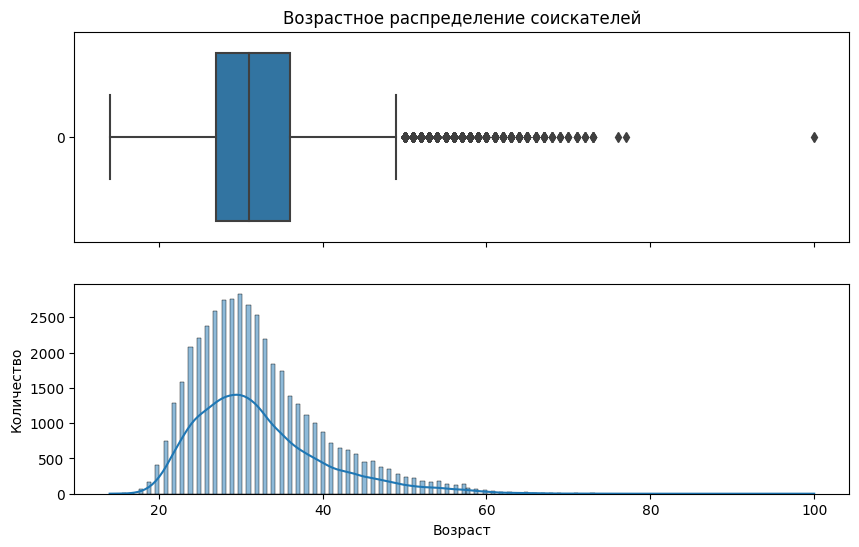

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)
sns.boxplot(
    data=main_df['Возраст'],
    orient='h',
    ax=axes[0]
)
sns.histplot(
    data=main_df['Возраст'],
    kde=True,
    ax=axes[1]
)
axes[0].set_title('Возрастное распределение соискателей')
axes[1].set_ylabel('Количество')

# Ответ на вопрос Задания 4.1
print(
    'Модальное значение возраста соискателей -',
    int(main_df['Возраст'].mode())
    )
print('Медианный возраст соискателей -', main_df['Возраст'].median())
print('Другая статистика:\n')
print(main_df['Возраст'].describe())

### Выводы ###

- Модальное значение возраста составляет 30 лет.
- Медианный возраст&nbsp;&mdash; 31 год.
- Средний возраст&nbsp;&mdash; около 32 лет.
- Межквартильный интервал (IQR)&nbsp;&mdash; от 27 до 36 лет. То есть в этом интервале возрастов находится половина соискателей.
- В целом же по предоставленным данным возраст соискателей простирается от 14 до 100 лет.
- Распределение близко по форме к логнормальному и явных аномалий не содержит. Допустимы выбросы до возраста почти 80 лет, и есть одно исключение&nbsp;&mdash; возраст 100 лет, что выглядит подозрительно и по всей видимости является ошибкой в данных.

----


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Модальное значение опыта соискателей - 81 (6.8 года)
Медианный опыт соискателей - 100.0 (8.3 года)
Среднее значение опыта соискателей - 114.4 (9.5 года)
Минимальный опыт соискателей - 1 (0.1 года)
Максимальный опыт соискателей - 1188 (99.0 года)
Квартиль Q25 - 57.0 (4.8 года)
Квартиль Q75 - 154.0 (12.8 года)


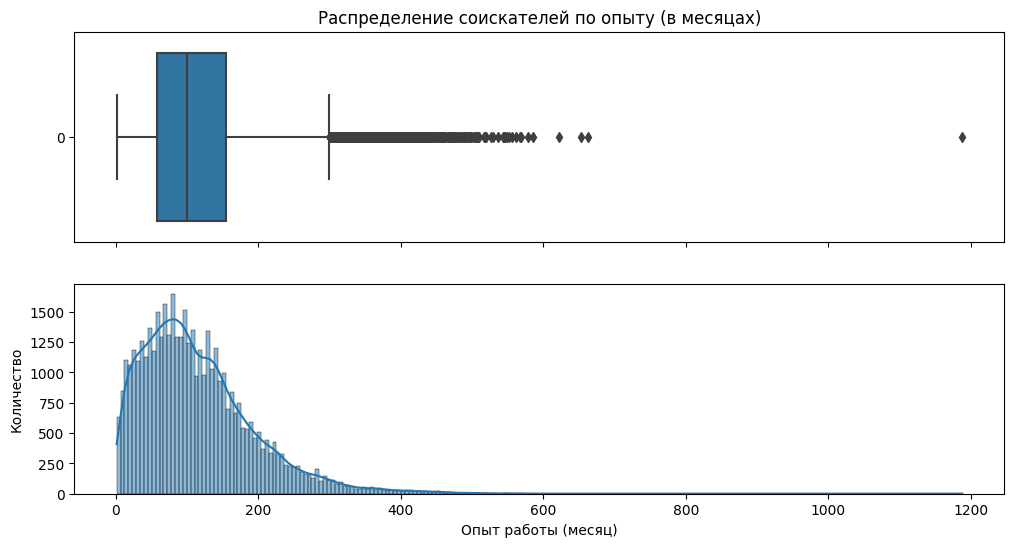

In [83]:
fixed_experience_ser = main_df['Опыт работы (месяц)'].dropna().astype('int32')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)
sns.boxplot(
    data=fixed_experience_ser,
    orient='h',
    ax=axes[0]
)
sns.histplot(
    data=fixed_experience_ser,
    kde=True,
    ax=axes[1]
)
axes[0].set_title('Распределение соискателей по опыту (в месяцах)')
axes[1].set_ylabel('Количество')

print(
    'Модальное значение опыта соискателей -',
    int(fixed_experience_ser.mode()),
    f'({round(float(fixed_experience_ser.mode() / 12), 1)} года)'
    )
print(
    'Медианный опыт соискателей -',
    fixed_experience_ser.median(),
    f'({round(fixed_experience_ser.median() / 12, 1)} года)'
    )
print(
    'Среднее значение опыта соискателей -',
    round(fixed_experience_ser.mean(), 1),
    f'({round(fixed_experience_ser.mean() / 12, 1)} года)'
    )
print(
    'Минимальный опыт соискателей -',
    fixed_experience_ser.min(),
    f'({round(fixed_experience_ser.min() / 12, 1)} года)'
    )
# Ответ на вопрос Задания 4.2
print(
    'Максимальный опыт соискателей -',
    fixed_experience_ser.max(),
    f'({round(fixed_experience_ser.max() / 12, 1)} года)'
    )
print(
    'Квартиль Q25 -',
    fixed_experience_ser.quantile(q=0.25),
    f'({round(fixed_experience_ser.quantile(q=0.25) / 12, 1)} года)'
    )
print(
    'Квартиль Q75 -',
    fixed_experience_ser.quantile(q=0.75),
    f'({round(fixed_experience_ser.quantile(q=0.75) / 12, 1)} года)'
    )

***Комментарий***

В признаке "`Опыт работы (месяц)`" есть пропуски и при построении в **Seaborn** коробчатой диаграммы **Jupyter Notebook** выдаёт ошибки, хотя при работе **Jupyter Notebook** в браузере всё нормально. Пришлось работать с временной серией, созданной из "`Опыт работы (месяц)`", удалив пропущенные данные.

### Выводы ###

- Модальное значение опыта работы составляет 81 месяц (6.8 года).
- Медианный опыт&nbsp;&mdash; 100 месяцев (8.3 года).
- Среднее значение опыта&nbsp;&mdash; около 114 месяцев (9.5 года).
- Межквантильный интервал (IQR)&nbsp;&mdash; от 57 месяцев (4.8 года) до 154 месяцев (12.8 года). То есть в этом интервале опыта находится половина соискателей.
- В целом же по предоставленным данным опыт работы соискателей простирается от 1 месяца (0.1 года) до 1188 месяцев (99.0 года).
- Распределение также близко по форме к логнормальному. Допустимы выбросы до значения немного выше 600 месяцев (50 лет), и есть опять одно исключение (скорее всего в той же самой строке)&nbsp;&mdash; 1188 месяцев (99.0 года), что выглядит подозрительно и по всей видимости является ошибкой в данных.

----


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [ ]:
# ваш код здесь

ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
# ваш код здесь

In [ ]:
ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [12]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь